## <font color=red> Problem Statement
To build an efficient ML model which could predict the number of shares of a specific news article before its publishing and also help identify which factors contribute most to the number of shares.

## <font color=red> Importing necessary libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# display max rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [3]:
# class to apply different formatting styles while printing
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# load dataset
news = pd.read_csv('train.csv')
unseen = pd.read_csv('test.csv')

In [5]:
# display top 5 rows
news.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [6]:
# check the shape
print(news.shape)
print(unseen.shape)

(29733, 61)
(9911, 60)


In [7]:
# check the information
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [8]:
# statistical analysis
news.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28921.000000,25200.000000,24326.000000,29146.000000,29733.000000,29269.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28649.000000,29277.000000,29649.000000,29596.000000,28218.000000,29616.000000,29428.000000,29052.000000,28760.000000,29449.000000,27971.000000,29409.000000,28752.000000,28980.000000,28179.000000,29434.000000,28867.000000,29642.000000,28237.000000,27565.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,27487.000000,29382.000000,28898.000000,28845.000000,29146.000000,29140.000000,28495.000000,29288.000000,29584.000000,29546.000000,28951.000000,29021.000000,29605.000000,29466.000000,28934.000000,28276.000000,29733.000000
mean,14866.000000,10.403861,545.376652,0.554071,1.004238,0.694586,10.866706,3.285397,4.512785,1.263364,4.542961,7.217978,0.052669,0.175327,0.158275,0.058386,0.185047,0.213870,25.835945,1154.769238,311.128475,13653.678571,753460.486214,259904.903376,1121.525349,5658.801071,3141.089645,3949.202204,10461.340237,6426.079278,0.167884,0.186784,0.187516,0.184073,0.142966,0.061905,0.068102,0.129766,0.185391,0.140411,0.217210,0.223688,0.233266,0.443130,0.118950,0.039554,0.016590,0.681376,0.287926,0.353170,0.095636,0.755106,-0.259057,-0.521207,-0.106996,0.282072,0.071137,0.342417,0.155628,3439.840581
std,8583.322113,2.122101,471.476136,4.064623,6.039790,3.768884,11.384882,3.851624,8.335517,4.158469,0.855936,1.912259,0.223375,0.380253,0.365005,0.234476,0.388342,0.410043,69.316700,4008.595967,623.943555,57864.532067,213165.450292,135215.399335,1136.661797,6094.277266,1323.734009,18771.379524,41548.116050,23705.054711,0.373770,0.389745,0.390332,0.387550,0.350044,0.240988,0.251926,0.336052,0.264106,0.218503,0.283237,0.295239,0.288963,0.117417,0.096957,0.017454,0.010783,0.191247,0.156156,0.105223,0.071699,0.248494,0.128085,0.291191,0.095238,0.324263,0.265052,0.188547,0.226089,12212.123341
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,7433.000000,9.000000,245.000000,0.471376,1.000000,0.626598,4.000000,1.000000,1.000000,0.000000,4.477124,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,141.000000,0.000000,843300.000000,173296.428572,0.000000,3562.101631,2386.456742,636.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025060,0.025013,0.028571,0.028571,0.0285

In [9]:
# check the number of unique values for all columns
uniq = news.nunique()
uniq

id                               29733
url                              29733
n_tokens_title                      20
n_tokens_content                  2250
n_unique_tokens                  21820
n_non_stop_words                  1404
n_non_stop_unique_tokens         18703
num_hrefs                          124
num_self_hrefs                      55
num_imgs                            86
num_videos                          52
average_token_length             23555
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          23
kw_max_min                        1038
kw_avg_min                       14367
kw_min_max                         957
kw_max_max                          30
kw_avg_max                       24057
kw_min_avg               

In [10]:
# seperate the continuous and categorical columns
cat_cols = uniq[uniq<5].index
cont_cols = news.columns.drop(cat_cols).drop(['id','url','shares'])
print(len(cat_cols))
print(len(cont_cols))

14
44


In [11]:
# categorize the variable names for better analysis.
word_features = ['n_tokens_title', 
                 'n_tokens_content', 
                 'n_unique_tokens', 
                 'n_non_stop_words', 
                 'n_non_stop_unique_tokens', 
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday_is_monday', 
                     'weekday_is_tuesday', 
                     'weekday_is_wednesday',
                     'weekday_is_thursday',
                     'weekday_is_friday',
                     'weekday_is_saturday',
                     'weekday_is_sunday',
                     'is_weekend']

channel_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                    'data_channel_is_bus', 'data_channel_is_socmed', 
                    'data_channel_is_tech', 'data_channel_is_world']

keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

ids = ['id']

others = ['url']

target = ['shares']

## <font color=red> Data Cleaning

### <font color=blue> Removing unwanted columns

In [12]:
# dropping 'url' column

# from news data
news = news.drop(columns='url')

# # from unseen data
# unseen = unseen.drop(columns='url')

In [13]:
# check the shape
print(news.shape)
# print(unseen.shape)

(29733, 60)


### <font color=blue> NULL values 

In [14]:
# checking NULL value percentages
null_df = news.isnull().sum()*100/len(news)
null_df

id                                0.000000
n_tokens_title                    0.000000
n_tokens_content                  0.000000
n_unique_tokens                   0.000000
n_non_stop_words                  0.000000
n_non_stop_unique_tokens          0.000000
num_hrefs                         2.730972
num_self_hrefs                   15.245687
num_imgs                         18.185181
num_videos                        1.974237
average_token_length              0.000000
num_keywords                      1.560556
data_channel_is_lifestyle         0.000000
data_channel_is_entertainment     0.000000
data_channel_is_bus               0.000000
data_channel_is_socmed            0.000000
data_channel_is_tech              0.000000
data_channel_is_world             0.000000
kw_min_min                        3.645781
kw_max_min                        1.533649
kw_avg_min                        0.282514
kw_min_max                        0.460767
kw_max_max                        5.095349
kw_avg_max 

In [15]:
# columns having NULL values
null_cols = null_df[null_df>0].index
len(null_cols)

41

**Days columns**

- There are columns corresponding to each day of the week
- The NULL values of any such column can be filled by looking at values of other colummn
- Let's say we have to fill for `weekday_is_monday`, we can look at other days and if they have 0, that means `weekday_is_monday` will have 1
- And if any other column has 1, `weekday_is_monday` will have 0

In [16]:
# filling up NULL values for 'days' column
days_list = temporal_features.copy()
days_list.remove('is_weekend')

for var in days_list:
    col_list2 = days_list.copy()
    col_list2.remove(var)
    
    # for news data
    idx = news[var][news[var].isnull()].index
    for i in idx:
        if news.loc[i,col_list2].any()==1:
            news.loc[i,var]=0
        else:
            news.loc[i,var]=1

In [17]:
# checking if NULL values have been filled
news[days_list].isnull().sum()

weekday_is_monday       0
weekday_is_tuesday      0
weekday_is_wednesday    0
weekday_is_thursday     0
weekday_is_friday       0
weekday_is_saturday     0
weekday_is_sunday       0
dtype: int64

- Filling value of `is_weekend` looking at `weekday_is_saturday` and `weekday_is_sunday`

In [18]:
# filling NULL values in 'is_weekend' column
weekend_cols = ['weekday_is_saturday','weekday_is_sunday']

# for news data
idx = news['is_weekend'][news.is_weekend.isnull()].index
for i in idx:
    if news.loc[i,weekend_cols].any()==1:
        news.loc[i,'is_weekend']=1
    else:
        news.loc[i,'is_weekend']=0

In [19]:
# checking if NULL values have been filled
news['is_weekend'].isnull().sum()

0

In [20]:
# checking NULL columns percentages again
null_df = news.isnull().sum()*100/len(news)
null_df[null_df>0]

num_hrefs                        2.730972
num_self_hrefs                  15.245687
num_imgs                        18.185181
num_videos                       1.974237
num_keywords                     1.560556
kw_min_min                       3.645781
kw_max_min                       1.533649
kw_avg_min                       0.282514
kw_min_max                       0.460767
kw_max_max                       5.095349
kw_avg_max                       0.393502
kw_min_avg                       1.025796
kw_max_avg                       2.290384
kw_avg_avg                       3.272458
self_reference_min_shares        0.955168
self_reference_max_shares        5.926075
self_reference_avg_sharess       1.089698
global_subjectivity              7.553896
global_sentiment_polarity        1.180507
global_rate_positive_words       2.808327
global_rate_negative_words       2.986581
rate_positive_words              1.974237
rate_negative_words              1.994417
avg_positive_polarity            4

In [21]:
# columns having NULL values
null_cols = null_df[null_df>0].index
len(null_cols)

33

**Sentiment Features**

In [22]:
# sentiment features NULL values treatment
for i in sentiment_features:
    news[i] = news[i].fillna(news[i].median())

# checking if NULL values have been filled
news[sentiment_features].isnull().sum()

global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
rate_positive_words             0
rate_negative_words             0
avg_positive_polarity           0
min_positive_polarity           0
max_positive_polarity           0
avg_negative_polarity           0
min_negative_polarity           0
max_negative_polarity           0
title_sentiment_polarity        0
abs_title_sentiment_polarity    0
dtype: int64

**Subjectivity Features**

In [23]:
# subjectivity features NULL values treatment
for i in subjectivity_features:
    news[i] = news[i].fillna(news[i].median())  

# checking if NULL values have been filled
news[subjectivity_features].isnull().sum()

global_subjectivity       0
title_subjectivity        0
abs_title_subjectivity    0
dtype: int64

**KNN Imputer**

- Will use KNN Imputer to fill NULL values of rest of the columns

In [24]:
# KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer()

news_impute = pd.DataFrame(imputer.fit_transform(news.drop(columns=['id','shares'])), 
                           columns=news.columns.drop(['id','shares']))

In [25]:
# checking if NULL values have been filled
news_impute.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

## <font color=red> Data Visualisation

### <font color=blue> Univariate Analysis

**Target Variable**

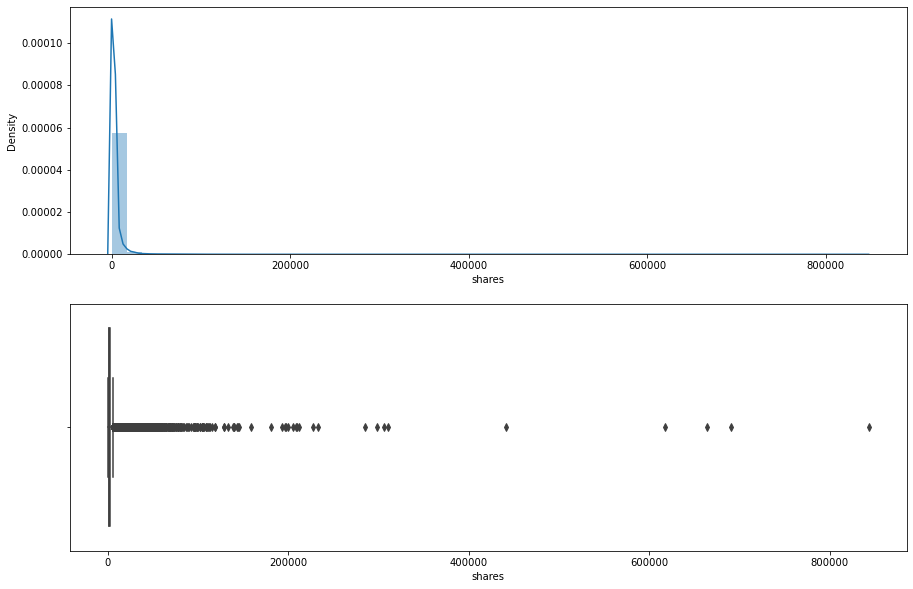

In [26]:
# plot for target variable
plt.figure(figsize=(15,10))

# distplot
plt.subplot(2,1,1)
sns.distplot(news.shares)

# boxplot
plt.subplot(2,1,2)
sns.boxplot(news.shares)

plt.show()

**Continuous Features**

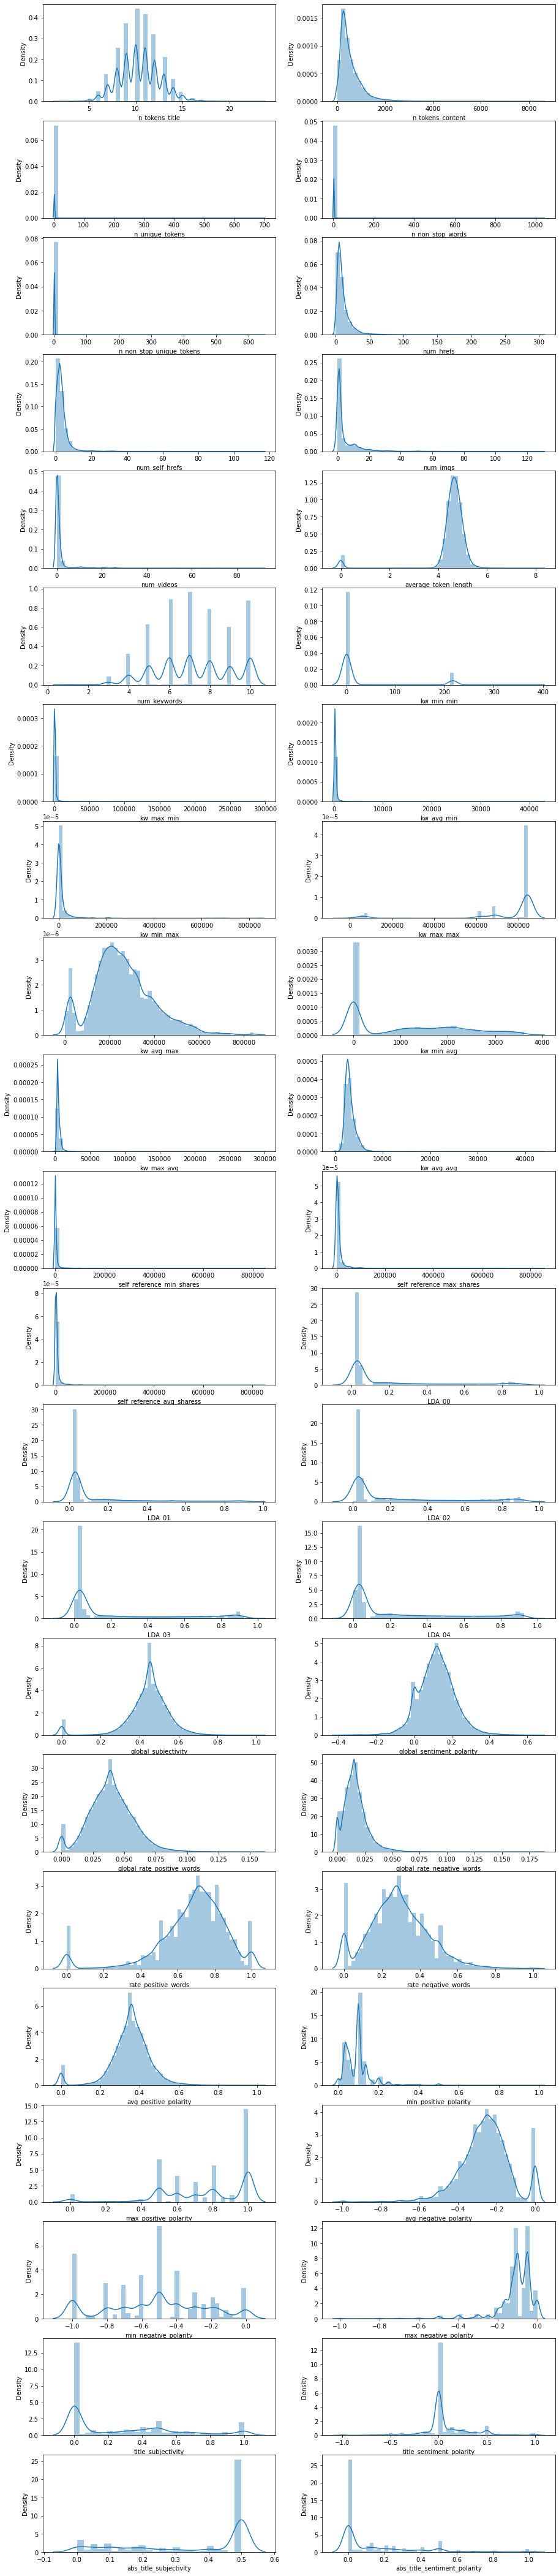

In [27]:
# dist plots of continuous columns
plt.figure(figsize=(15,80))
for i,v in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2+1,2,i+1)
    sns.distplot(news_impute[v])

- Looking at distribution plots, it is evident that not all features show normal distribution
- Some of them are left or right skewed
- We may have to go for a Non-Linear Regression model instead of a Linear model

### <font color=blue> Bivariate Analysis

In [28]:
# creating a df containing count of articles and avg shares for each day
days_df = pd.DataFrame({'Days':['Mon','Tue','Wed','Thur','Fri','Sat','Sun']})
days_df['Count'] = [news[i].value_counts()[1] for i in days_list]
days_df['Avg_shares'] = [round(news.shares[news[i]==1].mean(),2) for i in days_list]

days_df

,Days,Count,Avg_shares
0,Mon,5022,3606.56
1,Tue,5562,3276.95
2,Wed,5575,3425.12
3,Thur,5466,3223.01
4,Fri,4250,3410.79
5,Sat,1841,4021.41
6,Sun,2017,3632.56


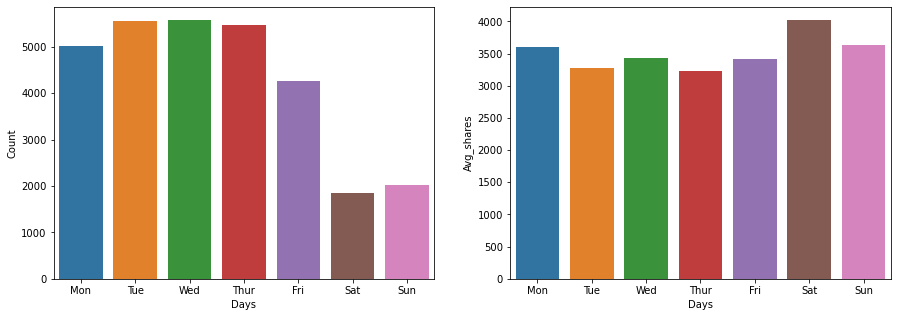

In [29]:
plt.figure(figsize=(15,5))

# barplot of number of articles count on each day
plt.subplot(1,2,1)
sns.barplot(data=days_df, x='Days', y='Count')

# barplot of average shares 
plt.subplot(1,2,2)
sns.barplot(data=days_df, x='Days', y='Avg_shares')

plt.show()

- Total number of articles published on weekends is comparatively lesser than compared to weekdays
- Average shares of article is a little higher on weekends compared to weekdays

In [30]:
# creating a df containing count of articles and avg shares for different channel_features
channel_df = pd.DataFrame({'Channel_features':['Lifestyle','Entertainment','Business','Social Media','Tech','World']})
channel_df['Count'] = [news[i].value_counts()[1] for i in channel_features]
channel_df['Avg_shares'] = [round(news.shares[news[i]==1].mean(),2) for i in channel_features]

channel_df

,Channel_features,Count,Avg_shares
0,Lifestyle,1566,3736.36
1,Entertainment,5213,3035.91
2,Business,4706,3054.39
3,Social Media,1736,3549.07
4,Tech,5502,3143.80
5,World,6359,2273.42


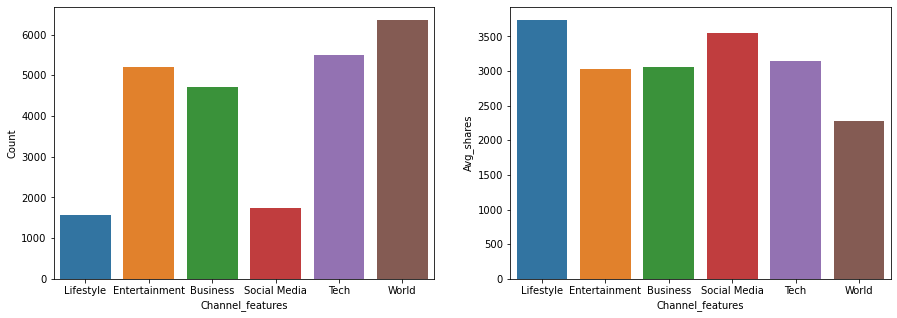

In [31]:
plt.figure(figsize=(15,5))

# barplot of number of articles count on each day
plt.subplot(1,2,1)
sns.barplot(data=channel_df, x='Channel_features', y='Count')

# barplot of average shares 
plt.subplot(1,2,2)
sns.barplot(data=channel_df, x='Channel_features', y='Avg_shares')

plt.show()

- Total number of articles published on feature `World` is highest with that on `Lifestyle` and `Social Media` being lowest
- Average share of `Lifestyle` articles is highest with that of `World` being lowest

### <font color=blue> Multivariate Analysis

In [32]:
# correlation table
news.corr()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
id,1.000000,0.003322,-0.004220,-0.004725,-0.004940,-0.004727,-0.005335,0.000370,-0.020984,0.006692,-0.007341,-0.005193,0.006011,0.003835,0.000021,0.005452,-0.000967,-0.009248,0.000320,0.004458,0.002433,0.003937,-0.003624,-0.000331,0.002943,0.005374,0.002707,-0.006151,0.003604,-0.003038,-0.005421,-0.000104,-0.000587,0.001835,0.001291,-0.005402,0.009704,0.003038,0.002952,-0.000863,-0.004512,0.002168,0.000256,-0.003265,-0.004521,0.004663,0.002454,-0.002288,-0.003955,-0.008557,-0.003782,-0.004682,-0.000788,-0.002886,-0.000379,-0.007344,-0.020693,0.003042,-0.002503,-0.002531
n_tokens_title,0.003322,1.000000,0.016609,-0.005735,-0.005177,-0.005801,-0.054610,-0.017379,-0.012149,0.053829,-0.073226,-0.004861,-0.070560,0.130948,-0.017741,-0.092611,-0.048936,0.048581,-0.108920,-0.008545,-0.033541,0.017981,0.119998,0.119250,0.001199,0.000999,0.003589,-0.004296,-0.000262,0.000078,0.000626,0.008849,0.013582,-0.017328,-0.001830,-0.010818,0.003871,-0.004442,-0.065409,0.059975,0.039192,0.039295,-0.064055,-0.051382,-0.066697,-0.059410,0.013668,-0.065504,0.028930,-0.048939,-0.028114,-0.021499,-0.014644,-0.028717,0.014862,0.078754,0.004385,-0.150472,0.043051,0.011883
n_tokens_content,-0.004220,0.016609,1.000000,-0.000818,0.018492,0.003676,0.427865,0.307824,0.351472,0.103067,0.171554,0.072345,0.038730,0.065392,-0.003310,0.030402,0.018139,0.058929,-0.051870,-0.000897,-0.005250,-0.017748,0.058619,-0.095494,-0.020926,-0.032456,-0.081522,-0.036908,0.027266,-0.016955,-0.000875,-0.005998,-0.019973,-0.005394,-0.015374,0.028360,0.044134,0.053341,0.030474,-0.005802,0.088003,-0.140736,0.033816,0.123960,0.022220,0.134349,0.130494,0.098032,0.106141,0.137674,-0.260453,0.417387,-0.134544,-0.449122,0.219449,0.002382,0.019025,0.006929,0.009012,0.005995
n_unique_tokens,-0.004725,-0.005735,-0.000818,1.000000,0.999680,0.999888,-0.003674,0.009385,0.028281,-0.000967,0.023540,-0.003323,-0.001765,0.012734,-0.000877,-0.001065,-0.002503,-0.005617,0.000736,-0.000435,-0.000898,0.000666,-0.000708,0.001314,0.005566,-0.002490,-0.002198,0.000768,-0.000618,0.001873,-0.002480,0.012188,-0.002528,-0.002724,-0.001841,-0.002551,-0.002079,-0.003375,-0.002928,-0.001744,-0.007049,-0.004393,-0.004666,-0.006842,-0.001270,-0.003270,-0.003061,-0.005561,-0.004056,-0.005566,0.006140,-0.012027,0.004056,0.011060,-0.004512,-0.005312,-0.002422,-0.010684,-0.004321,0.000890
n_non_stop_words,-0.004940,-0.005177,0.018492,0.999680,1.000000,0.999653,0.004833,0.014967,0.035982,-0.001213,0.028082,-0.001382,-0.000539,0.012710,-0.000579,-0.000412,-0.000592,-0.003082,-0.000888,-0.000523,-0.001037,-0.000213,0.001021,-0.001866,0.004502,-0.003541,-0.004979,0.000089,-0.000259,0.001504,-0.002442,0.012015,-0.002862,-0.002676,-0.002339,-0.001659,-0.001584,-0.002372,-0.001811,-0.003475,-0.003924,-0.009649,-0.002073,-0.004480,-0.000955,-0.001965,-0.001287,-0.002881,-0.001467,-0.003066,-0.001045,-0.002300,0.001468,0.001446,0.000921,-0.005977,-0.001882,-0.010098,-0.004578,0.000646
n_non_stop

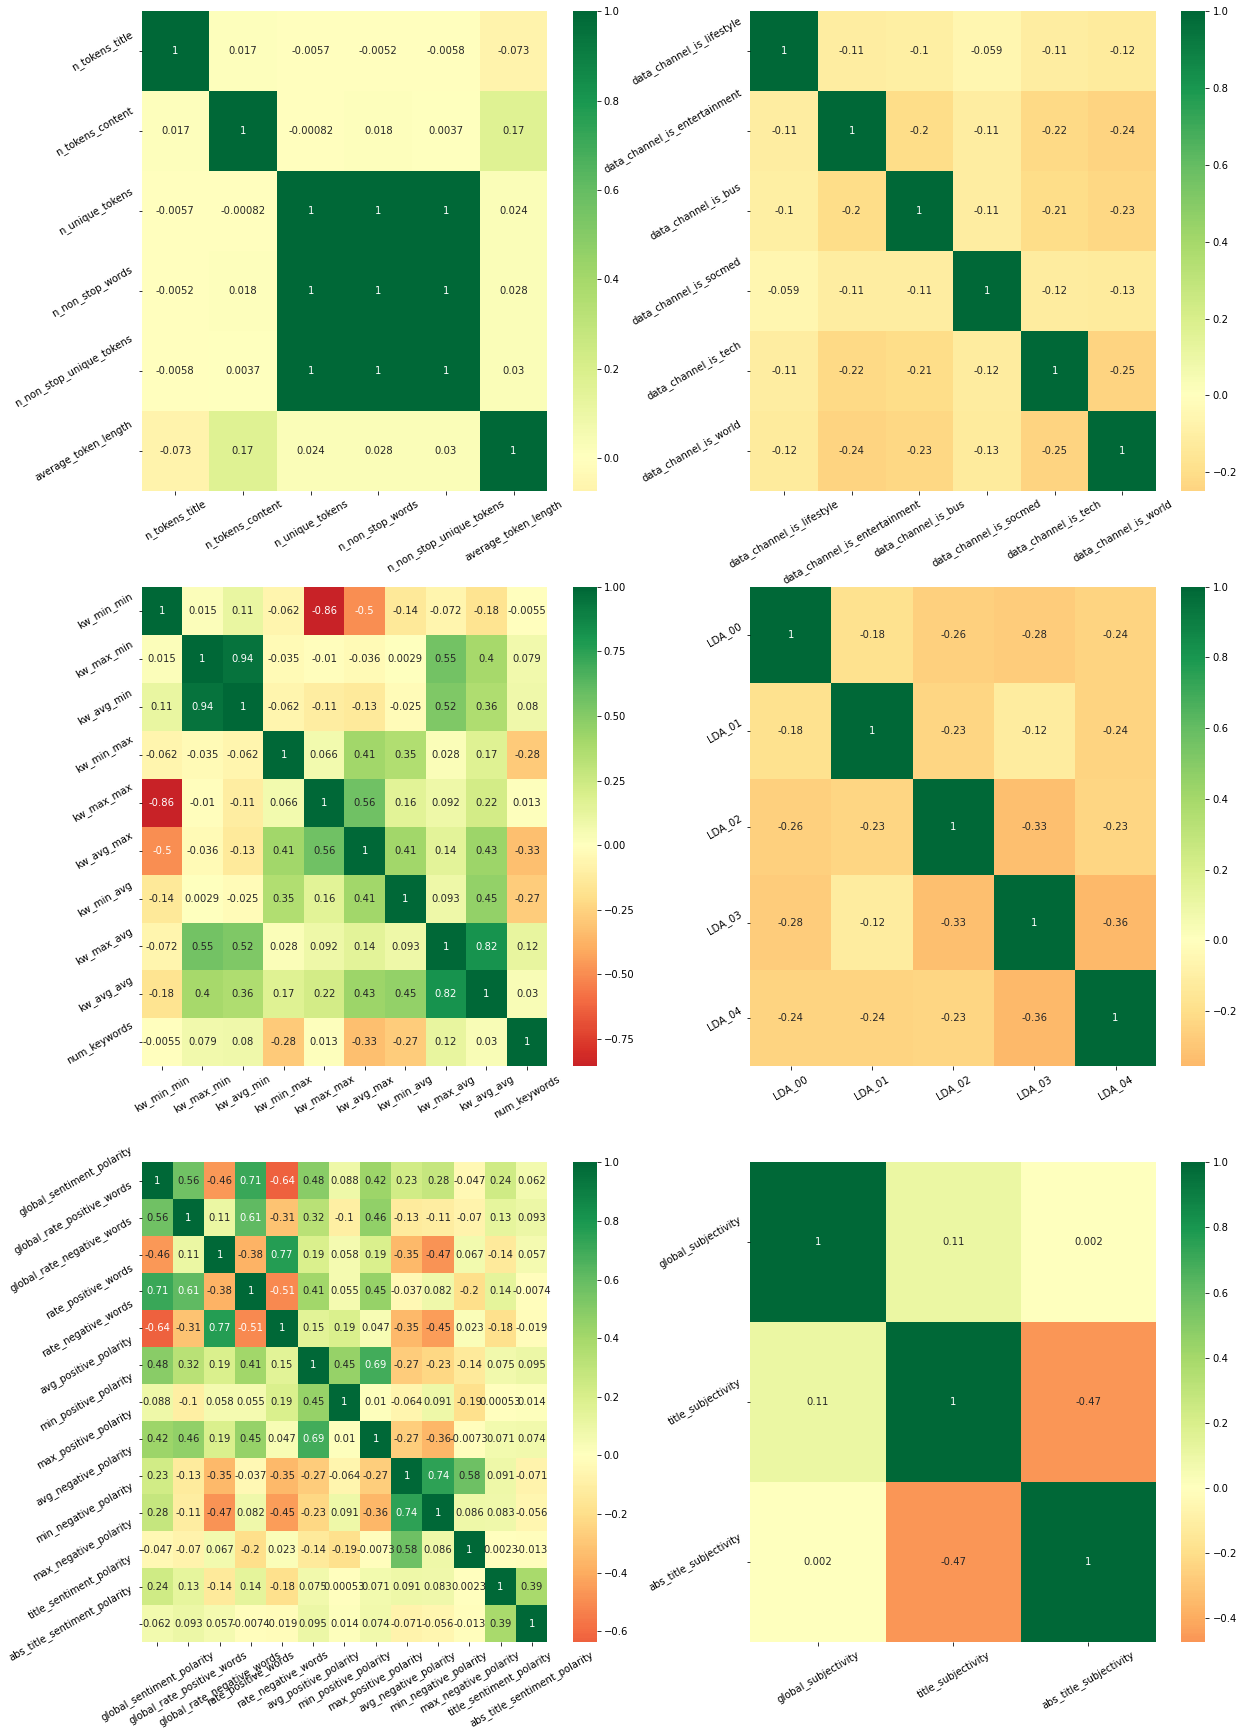

In [33]:
# heatmap
plt.figure(figsize=(20,30))
for i,v in enumerate([word_features,channel_features,keyword_features,
                      topic_features,sentiment_features,subjectivity_features]):
    plt.subplot(3,2,i+1)
    sns.heatmap(news[v].corr(), annot=True, cmap='RdYlGn', center=0)
    plt.xticks(rotation=30)
    plt.yticks(rotation=30)

- Some of the `word_features` are higly correlated with each other
- Also very few of the `topic_features` and `sentient_features` are correlated with each other

## <font color=red> Data Preprocessing

### <font color=blue> Outliers treatment

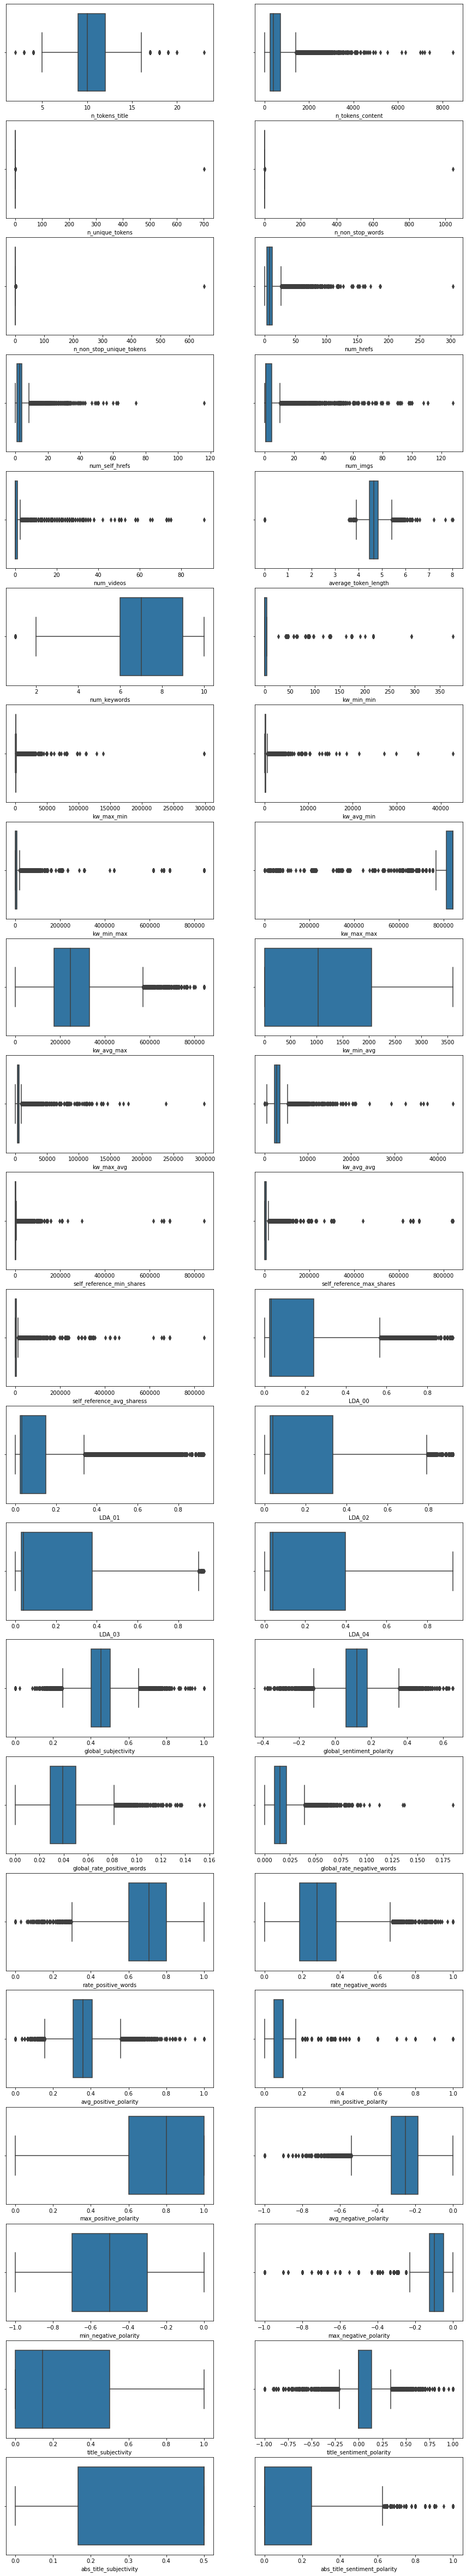

In [34]:
# boxplot of continuous columns to check outliers
plt.figure(figsize=(15,90))
for i,v in enumerate(cont_cols):
    plt.subplot(23,2,i+1)
    sns.boxplot(news_impute[v])

- `n_unique_tokens`, `n_non_stop_words`, `n_non_stop_unique_tokens` are columns which show "rate"
- Such columns values should lie between 0 and 1
- Will remove rows having values outside the range

In [35]:
print(news[news.n_unique_tokens==news.n_unique_tokens.max()].index)
print(news[news.n_non_stop_words==news.n_non_stop_words.max()].index)
print(news[news.n_non_stop_unique_tokens==news.n_non_stop_unique_tokens.max()].index)

Int64Index([7838], dtype='int64')
Int64Index([7838], dtype='int64')
Int64Index([7838], dtype='int64')


- There is only one row which contains outlier for the columns mentioned
- Removing row with index=7838

In [36]:
# removing row of index=7838
news_impute = news_impute.drop(index=7838)
news = news.drop(index=7838)
news_impute.shape

(29732, 58)

**Treatment of other columns containing outliers**

In [37]:
# columns containing outliers which will be treated
cols_outliers = ['n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos',
                 'kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_max_avg','kw_avg_avg',
                 'self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']

In [38]:
# defining a function for outlier capping
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [39]:
# capping outliers

# for churn dataset
news_impute[cols_outliers] = news_impute[cols_outliers].apply(cap_outliers, axis=0)

## <font color=red> Data Preparation

### <font color=blue> Spliting data

In [40]:
# splitting data into X and y
X = news_impute.copy()
y = news.shares

In [41]:
# importing library
from sklearn.model_selection import train_test_split

#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

### <font color=blue> Scaling

In [42]:
# importing library
from sklearn.preprocessing import StandardScaler

# initiate object
scaler = StandardScaler()

# fit_transform() train data
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])

# transform() test data
X_test[cont_cols] = scaler.transform(X_test[cont_cols])

## <font color=red> Model Building

### <font color=blue> Linear Regression (without PCA) (to identify top features)

In [43]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

<font color=brown> **Base LR Model**

In [44]:
# base lr model
lr_base = LinearRegression()
lr_base = lr_base.fit(X_train, y_train)

# prediction on train and test
y_train_pred_lr_base = lr_base.predict(X_train)
y_test_pred_lr_base = lr_base.predict(X_test)

In [45]:
# import libraries
from sklearn import metrics

#Metric report function
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print(color.RED+'explained_variance: '+color.END, round(explained_variance,4))    
    print(color.RED+'r2: '+color.END, round(r2,4))
    print(color.RED+'MAE: '+color.END, round(mean_absolute_error,4))
    print(color.RED+'MSE: '+color.END, round(mse,4))
    print(color.RED+'RMSE: '+color.END, round(np.sqrt(mse),4))

In [46]:
# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_lr_base)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_lr_base)

Train metrics
explained_variance:  0.0241
r2:  0.0241
MAE:  3049.1353
MSE:  127031908.3038
RMSE:  11270.8433

Test metrics
explained_variance:  0.016
r2:  0.0159
MAE:  3196.4425
MSE:  190315481.2913
RMSE:  13795.4877


<font color=brown> **Linear Regression with RFECV**

- Will use RFECV method to find the top features

In [47]:
# rfecv
rfecv = RFECV(estimator=lr_base, n_jobs=-1, cv=5, scoring='neg_root_mean_squared_error')
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_root_mean_squared_error')

In [48]:
cv_results = pd.DataFrame(rfecv.cv_results_)
cv_results

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,-10806.035443,3664.362701,-6851.016265,-13664.645852,-7005.258918,-10348.872961,-16160.383219
1,-10806.671410,3665.074494,-6850.570720,-13665.242448,-7001.742357,-10355.560463,-16160.241060
2,-10807.088888,3664.811186,-6850.883692,-13665.382176,-7002.825676,-10356.045678,-16160.307219
3,-10806.788299,3665.392881,-6850.040316,-13666.250394,-7001.594507,-10355.745118,-16160.311161
4,-10805.749527,3665.142343,-6849.902623,-13665.969531,-6999.624317,-10355.196384,-16158.054779
5,-10806.003148,3665.370804,-6849.796758,-13666.651771,-6999.733434,-10355.349155,-16158.484624
6,-10805.964365,3665.159560,-6849.909843,-13666.693627,-6999.796275,-10355.538895,-16157.883186
7,-10758.161915,3670.727055,-6812.237922,-13620.131880,-6921.501554,-10321.590476,-16115.347742
8,-10750.271811,3669.437014,-6805.873856,-13611.188446,-6915.786368,-10312.339278,-16106.171106
9,-10750.711948,3668.493771,-6807.635152,-13611.135530,-6917.743378,-10311.452056,-16105.593622


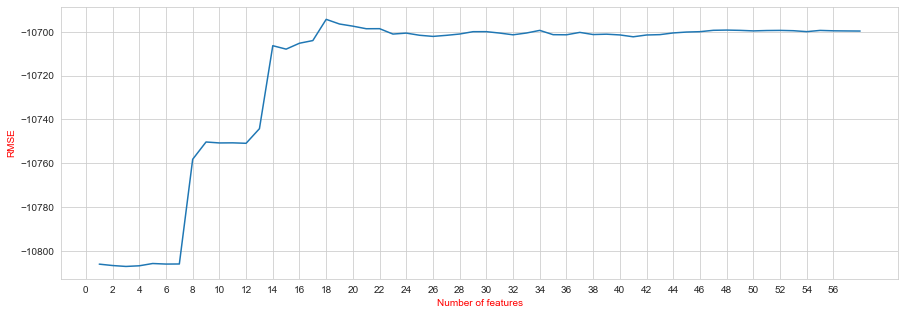

In [49]:
# plot RMSE scores for different number of features
num_features = X_train.shape[1]
sns.set_style('whitegrid')
plt.figure(figsize=[15, 5])
plt.plot(range(1, num_features+1), cv_results.mean_test_score)
plt.xticks(range(0,num_features,2))
plt.xlabel('Number of features', color='r')
plt.ylabel('RMSE', color='r')
plt.show()

- We can clearly see for 18 features, we get best score

In [50]:
# check to see raankings of features selected by RFE
pd.DataFrame(zip(rfecv.feature_names_in_,rfecv.support_,rfecv.ranking_), 
             columns=['Features','Selected','Ranking']).sort_values(by='Ranking')

,Features,Selected,Ranking
37,LDA_00,True,1
31,weekday_is_wednesday,True,1
27,self_reference_max_shares,True,1
25,kw_avg_avg,True,1
32,weekday_is_thursday,True,1
33,weekday_is_friday,True,1
34,weekday_is_saturday,True,1
35,weekday_is_sunday,True,1
36,is_weekend,True,1
29,weekday_is_monday,True,1


In [51]:
# columns selected by RFE
cols_rfe = X_train.columns[rfecv.support_]
len(cols_rfe)

18

In [52]:
# lr+rfe model
lr_rfe = LinearRegression()
lr_rfe = lr_rfe.fit(X_train[cols_rfe], y_train)

# prediction on train and test
y_train_pred_lr_rfe = lr_rfe.predict(X_train[cols_rfe])
y_test_pred_lr_rfe = lr_rfe.predict(X_test[cols_rfe])

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_lr_rfe)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_lr_rfe)

Train metrics
explained_variance:  0.02
r2:  0.02
MAE:  3053.8638
MSE:  127555848.0955
RMSE:  11294.0625

Test metrics
explained_variance:  0.0129
r2:  0.0127
MAE:  3218.1786
MSE:  190918476.1165
RMSE:  13817.3252


**Residual Analysis (to check if Linear Regression assumptions are valid)** 

In [53]:
# residuals
res = y_train - y_train_pred_lr_rfe

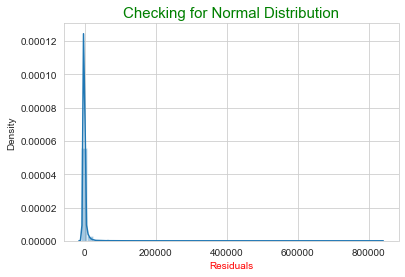

In [54]:
# check for noral distribution of residual terms
sns.distplot(res)
plt.title('Checking for Normal Distribution',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.xlabel('Residuals', color='r')
plt.show()

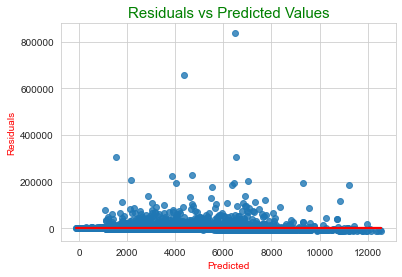

In [55]:
sns.regplot(x= y_train_pred_lr_rfe, y=res, line_kws={'color':'red'})

plt.title('Residuals vs Predicted Values', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})               
plt.xlabel('Predicted', color='r')                       
plt.ylabel('Residuals', color='r')
plt.show()

- Residuals don't show Normal Distribution
- No autocorrelation of error terms
- Heteroscedasticity

Thus it is advisable to go for non-linear regression model or any other model to make predictions for shares as well as get top features

### <font color=blue> Random Forest (without PCA) (to find top features)

In [56]:
# import library
from sklearn.ensemble import RandomForestRegressor

# initiate object
rf = RandomForestRegressor(random_state=100, oob_score=True, n_jobs=-1)
rf = rf.fit(X_train, y_train)

# predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_rf)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_rf)

Train metrics
explained_variance:  0.8587
r2:  0.8584
MAE:  1280.0572
MSE:  18430407.3283
RMSE:  4293.065

Test metrics
explained_variance:  -0.0506
r2:  -0.0513
MAE:  3567.9921
MSE:  203306647.0547
RMSE:  14258.564


In [57]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Hyper parameter Tuning
params = {
    'n_estimators'  : [50,100],
    'max_depth' : [15,20],
    'min_samples_leaf' : [100,150]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
rf_model_search = GridSearchCV(estimator=rf, param_grid=params, 
                                   cv=folds, scoring='neg_root_mean_squared_error', verbose=True, n_jobs=-1 )

rf_model_search.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 150],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [58]:
# best parameters and score
print(rf_model_search.best_estimator_)
print(rf_model_search.best_score_)

RandomForestRegressor(max_depth=20, min_samples_leaf=150, n_jobs=-1,
                      oob_score=True, random_state=100)
-10532.252027568451


In [59]:
# results of grid search CV
rf_cv_results = pd.DataFrame(rf_model_search.cv_results_)
rf_cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,16.978262,1.866838,0.594295,0.587423,20,150,100,"{'max_depth': 20, 'min_samples_leaf': 150, 'n_...",-7014.231578,-17405.160366,-9467.922284,-8241.693882,-10532.252028,4061.797365,1
3,28.125088,0.136080,1.745879,0.016301,15,150,100,"{'max_depth': 15, 'min_samples_leaf': 150, 'n_...",-7014.231578,-17405.160366,-9467.922284,-8241.701860,-10532.254022,4061.796240,2
6,17.130022,1.377383,2.903967,0.274869,20,150,50,"{'max_depth': 20, 'min_samples_leaf': 150, 'n_...",-7017.950833,-17403.474039,-9462.355942,-8247.224163,-10532.751245,4059.865570,3
2,14.293946,0.941265,2.954220,0.273889,15,150,50,"{'max_depth': 15, 'min_samples_leaf': 150, 'n_...",-7017.950833,-17403.474039,-9462.355942,-8247.229765,-10532.752645,4059.864782,4
0,16.135576,3.046206,1.219219,1.185533,15,100,50,"{'max_depth': 15, 'min_samples_leaf': 100, 'n_...",-7020.081300,-17411.728804,-9468.916461,-8239.967588,-10535.173538,4063.488657,5
4,15.514652,2.587746,2.263669,0.968397,20,100,50,"{'max_depth': 20, 'min_samples_leaf': 100, 'n_...",-7020.101349,-17411.755739,-9468.923730,-8239.940668,-10535.180371,4063.499041,6
1,27.012004,0.275307,0.491170,0.151496,15,100,100,"{'max_depth': 15, 'min_samples_leaf': 100, 'n_...",-7013.879247,-17410.025391,-9475.463199,-8243.108256,-10535.619023,4063.239162,7
5,27.851818,0.263867,2.735204,0.653710,20,100,100,"{'max_depth': 20, 'min_samples_leaf': 100, 'n_...",-7013.887215,-17410.048207,-9475.464172,-8243.085025,-10535.621155,4063.250299,8


In [60]:
# Modelling using the best RF estimator 
rf_best = rf_model_search.best_estimator_
rf_best = rf_best.fit(X_train, y_train)

# predictions
y_train_pred_rf_best = rf_best.predict(X_train)
y_test_pred_rf_best = rf_best.predict(X_test)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_rf_best)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_rf_best)

Train metrics
explained_variance:  0.0462
r2:  0.0462
MAE:  2949.4893
MSE:  124147526.798
RMSE:  11142.1509

Test metrics
explained_variance:  0.0152
r2:  0.015
MAE:  3173.8296
MSE:  190478837.107
RMSE:  13801.4071


In [61]:
# top features
df_coeff = pd.DataFrame({'Features':rf_best.feature_names_in_, 'Importance':rf_best.feature_importances_})
df_coeff = df_coeff.sort_values(by = 'Importance', ascending=False)

top_features = df_coeff.head(10)
top_features

,Features,Importance
25,kw_avg_avg,0.313123
28,self_reference_avg_sharess,0.179274
5,num_hrefs,0.064475
24,kw_max_avg,0.057222
42,global_subjectivity,0.025603
26,self_reference_min_shares,0.024768
40,LDA_03,0.024466
27,self_reference_max_shares,0.023008
1,n_tokens_content,0.022843
2,n_unique_tokens,0.022646


### <font color=blue> Polynomial Regression

In [62]:
# import library
from sklearn.preprocessing import PolynomialFeatures

# Building the polynomial regression model with degree 2
degree=2 
polyreg = PolynomialFeatures(degree)
X_train_poly = polyreg.fit_transform(X_train)# Transform the variable X to 1, X, X^2
X_test_poly = polyreg.transform(X_test)

In [63]:
# lr+poly model
lr_poly = LinearRegression()
lr_poly = lr_poly.fit(X_train_poly, y_train)

# prediction on train and test
y_train_pred_lr_poly = lr_poly.predict(X_train_poly)
y_test_pred_lr_poly = lr_poly.predict(X_test_poly)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_lr_poly)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_lr_poly)

Train metrics
explained_variance:  0.1268
r2:  0.1268
MAE:  3777.2339
MSE:  113654265.1695
RMSE:  10660.8754

Test metrics
explained_variance:  -1.9996510790494308e+18
r2:  -1.9998504233138534e+18
MAE:  371046961611.2246
MSE:  3.86737149227424e+26
RMSE:  19665633710293.293


- Clarly the model is overfitting
- Let's go for Ridge and Lasso to avoid it

### <font color=blue> Ridge and Lasso

In [64]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

**Ridge**

In [65]:
# list of alphas to tune 
params = {'alpha': [100, 1000, 5000, 20000]}

ridge = Ridge()

# cross validation
folds = 4
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            
ridge_cv.fit(X_train_poly, y_train) 

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [100, 1000, 5000, 20000]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [66]:
# best parameters and score
print(ridge_cv.best_estimator_)
print(ridge_cv.best_score_)

Ridge(alpha=20000)
-10798.725813624294


In [67]:
# results of GridSearchCV
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
3,14.748585,0.078371,0.047006,0.012274,20000,{'alpha': 20000},-6523.531522,-12650.150824,-8572.975946,-15448.244962,-10798.725814,3474.084469,1,-12277.095169,-10650.102094,-11856.669350,-9297.047634,-11020.228562,1160.354792
2,16.236705,0.953046,0.062002,0.004843,5000,{'alpha': 5000},-6683.605551,-12710.838860,-8656.138150,-15498.701297,-10887.320965,3436.547909,2,-12107.733664,-10517.983655,-11691.551358,-9132.279970,-10862.387162,1156.534246
1,23.175574,1.276845,0.178763,0.061691,1000,{'alpha': 1000},-7007.148789,-12839.871074,-8844.676982,-15597.276710,-11072.243389,3357.360585,3,-11899.123859,-10357.027534,-11493.223861,-8954.956593,-10676.082962,1143.199526
0,21.966219,1.959301,0.170518,0.049355,100,{'alpha': 100},-7625.634929,-13055.846499,-9209.831666,-15734.429422,-11406.435629,3184.792356,4,-11691.418043,-10196.419567,-11301.198853,-8803.749918,-10498.196595,1121.473246


In [68]:
# alpha = 20000
ridge = ridge_cv.best_estimator_
ridge.fit(X_train_poly, y_train)

y_train_pred_ridge = ridge.predict(X_train_poly)
y_test_pred_ridge = ridge.predict(X_test_poly)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_ridge)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_ridge)

Train metrics
explained_variance:  0.0524
r2:  0.0524
MAE:  3022.6891
MSE:  123336171.9101
RMSE:  11105.682

Test metrics
explained_variance:  0.0125
r2:  0.0123
MAE:  3219.9444
MSE:  191003149.5334
RMSE:  13820.3889


**Lasso**

In [69]:
# list of alphas to tune 
params = {'alpha': [10, 100, 200, 500]}

lasso = Lasso()

# cross validation
folds = 4
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            
lasso_cv.fit(X_train_poly, y_train) 

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [10, 100, 200, 500]}, return_train_score=True,
             scoring='neg_root_mean_squared_error', verbose=1)

In [70]:
# best parameter and score
print(lasso_cv.best_estimator_)
print(lasso_cv.best_score_)

Lasso(alpha=200)
-10755.83262599677


In [71]:
# results of GridSearchCV
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
2,12.414171,3.196572,0.079260,0.017314,200,{'alpha': 200},-6445.820836,-12614.789379,-8545.778845,-15416.941444,-10755.832626,3487.197835,1,-12436.190393,-10793.133732,-12015.129899,-9473.199368,-11179.413348,1155.236857
3,5.557160,0.722486,0.074755,0.016863,500,{'alpha': 500},-6441.607050,-12648.206344,-8574.724238,-15441.242150,-10776.444946,3496.506018,2,-12512.986453,-10842.221640,-12086.000885,-9560.092219,-11250.325299,1152.833828
1,32.785125,12.229951,0.116008,0.016450,100,{'alpha': 100},-6552.394112,-12630.227081,-8560.255821,-15428.258577,-10792.783898,3457.922429,3,-12317.912275,-10719.966447,-11902.803633,-9361.993861,-11075.669054,1150.057264
0,94.147702,1.039813,0.060003,0.009900,10,{'alpha': 10},-7277.299276,-12911.740777,-8978.831077,-15628.130031,-11199.000290,3273.360674,4,-11810.350609,-10316.636600,-11422.896235,-8923.795385,-10618.419707,1121.461813


In [72]:
# alpha = 200
lasso = lasso_cv.best_estimator_
lasso.fit(X_train_poly, y_train)

y_train_pred_lasso = lasso.predict(X_train_poly)
y_test_pred_lasso = lasso.predict(X_test_poly)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_lasso)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_lasso)

Train metrics
explained_variance:  0.0255
r2:  0.0255
MAE:  3036.8465
MSE:  126850104.7273
RMSE:  11262.7752

Test metrics
explained_variance:  0.0132
r2:  0.013
MAE:  3202.8511
MSE:  190864233.0884
RMSE:  13815.3622


### <font color=blue> Feature Engineering with PCA 

In [73]:
# import library
from sklearn.decomposition import PCA

# initiate object
pca = PCA(random_state=42)

# fit() model
pca.fit(X_train)

PCA(random_state=42)

In [74]:
pca.explained_variance_ratio_

array([1.35972639e-01, 8.96335208e-02, 7.76375429e-02, 6.55643081e-02,
       5.79143856e-02, 5.21564269e-02, 4.51756450e-02, 3.88787017e-02,
       3.60298923e-02, 3.19261240e-02, 2.90567167e-02, 2.85195036e-02,
       2.59713706e-02, 2.48411597e-02, 2.24247639e-02, 2.07195260e-02,
       1.93912402e-02, 1.64894490e-02, 1.51727092e-02, 1.36950946e-02,
       1.35127306e-02, 1.17474441e-02, 1.12561240e-02, 1.01333923e-02,
       1.01006804e-02, 9.48911923e-03, 8.72651409e-03, 7.97299711e-03,
       7.53642039e-03, 6.00718624e-03, 5.84948446e-03, 4.40524556e-03,
       4.11804744e-03, 4.08768416e-03, 4.05316673e-03, 3.90411465e-03,
       3.74224299e-03, 3.24240729e-03, 2.97647436e-03, 2.47692488e-03,
       2.20384583e-03, 2.07994954e-03, 1.74680817e-03, 1.62033893e-03,
       1.42403586e-03, 1.38084278e-03, 1.33997046e-03, 1.14766246e-03,
       1.07827133e-03, 9.47521594e-04, 8.34347187e-04, 7.57627722e-04,
       5.09066843e-04, 2.71977973e-04, 1.43002391e-04, 5.61038074e-06,
      

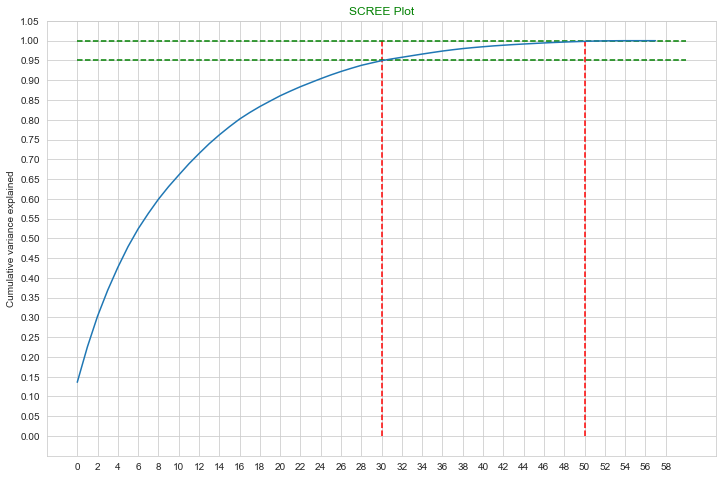

In [75]:
# SCREE plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.hlines(y=1.0, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.title('SCREE Plot', color='g')
plt.xticks(np.arange(0,60,2))
plt.yticks(np.arange(0,1.1,0.05))
plt.show()

From the above scree plot, it is clear that 
- 95% of variance in the train set can be explained by first 30 principal components 
- 100% of variance is explained by the first 50 principal components. 

In [76]:
# Perform PCA using the first 50 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)
transformed_data = pca_final.fit_transform(X_train)

X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,51)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,shares
20314,-1.086130,1.737587,3.350698,-0.651773,-0.306927,-1.060806,-0.349910,0.874973,-0.284354,0.402199,-0.513835,-0.071599,0.138563,0.136691,2.158419,1.389547,0.137706,1.341772,1.987956,-0.729331,0.695956,0.449188,0.923457,-0.350432,-0.709227,0.363644,-0.061049,1.389846,-0.409905,0.614832,-0.517698,0.103967,0.818410,0.232873,0.304063,-0.819862,-0.168275,-0.113366,-0.329841,-0.403795,-1.166296,0.339172,0.080168,0.052170,0.598419,0.596815,0.118359,-0.053461,-0.040286,0.387131,2400
27136,-2.143944,-4.910213,1.904368,-0.567453,-0.252416,-1.159383,1.160010,-0.994351,-0.671477,0.299336,-1.411005,-1.114594,0.406000,-0.869352,1.051042,-1.232131,-0.110145,0.208185,-0.292607,-1.083017,-0.488595,0.558491,0.194392,0.288636,-0.410960,-0.189823,-0.087854,-0.183207,0.346239,-0.882893,0.361204,0.381711,-0.233154,-0.141693,0.026608,-0.456702,0.985569,-0.322514,-2.329790,0.269687,0.243470,-0.343936,-0.316736,-0.064249,0.091177,0.054015,0.427471,-0.333071,-0.050267,-0.075267,598
14712,0.196544,-0.421510,-1.100488,0.858919,-2.038995,-1.263234,-1.576299,-0.704582,2.370118,-0.413332,-0.534635,0.426721,-0.720080,1.041907,0.245862,0.963665,-0.664844,0.395888,0.245790,-0.675482,0.061785,0.438567,0.771893,-0.457237,0.315557,-0.269327,-0.213807,-0.361753,0.400829,0.377297,-0.155688,0.505533,-0.231288,0.636729,-0.193588,0.323510,-0.290005,-0.141588,-0.077075,-0.028220,-0.071988,-0.120651,0.017916,0.018298,-0.072638,0.047599,-0.044396,-0.162415,0.145105,0.047164,1800
1746,-12.907115,0.664586,-1.776435,0.370203,0.971718,-0.314430,-0.717867,-1.024643,-0.995137,-1.542304,0.160404,0.958755,-0.334384,0.646722,-0.681043,-0.209130,0.764918,0.049119,0.550629,0.293212,0.364676,-0.335600,0.465834,-0.130803,0.197399,-0.126676,-0.129903,-0.215249,-0.056786,-0.069814,-0.005116,-0.044243,0.122611,-0.562854,-0.606680,0.080318,-0.254379,-0.136770,0.095111,0.015845,-0.024858,-0.028035,0.027206,-0.112924,0.290176,-0.290521,-0.403680,-0.141138,0.214869,0.258274,999
14368,-0.033257,-1.206064,0.872431,-1.267593,-0.539403,-0.515143,-0.698910,0.363940,0.167504,-0.204457,-1.174919,0.330895,-0.197409,-0.221562,-0.345844,-0.025549,-0.471215,0.032076,-1.151701,-0.051367,0.497221,-0.263375,0.549056,-0.358199,-1.097102,-0.088921,-0.136818,0.520639,0.057990,-0.413473,-0.075364,0.002327,0.108650,0.025127,0.061202,0.144353,0.113538,0.909063,0.083849,0.053554,-0.148798,-0.216067,-0.139029,0.043740,-0.238467,0.266221,0.397031,0.115016,0.033082,0.469935,664


In [77]:
# create X_test_pca
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=["PC_"+str(x) for x in range(1,51)], index = X_test.index)
X_test_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
17723,1.298390,1.700463,0.566522,-2.067931,1.539608,0.500168,2.194401,0.497479,-0.468818,-1.895888,0.732847,1.076234,1.926610,0.990519,-0.223176,-0.095379,-0.493282,-1.196772,0.371871,-0.244721,-0.992677,-0.855274,-0.157104,-0.714709,-0.959773,-0.071314,1.286920,0.225871,0.068363,-0.497019,-0.358780,0.091884,-0.319254,-0.331678,0.694817,0.025850,-0.314092,-0.150927,0.135523,0.507951,-0.516752,-0.024842,-0.079432,-0.462222,-0.030073,-0.012253,-0.135592,-0.054476,0.131268,0.069949
2917,-13.164191,3.056103,-2.948855,-0.229020,0.496916,1.489680,-0.585193,-1.290673,-0.137128,0.160202,0.778939,-0.029609,0.109652,-0.663760,-0.513753,0.001069,-0.101861,-0.467020,1.250843,0.410948,-0.104910,-0.319280,0.395098,0.576019,-0.192543,0.006686,0.050894,0.052003,0.128401,0.543591,0.857386,-0.103596,-0.043204,-0.012937,-0.010979,0.131450,0.884602,-0.246008,0.009298,-0.057128,0.090836,0.401792,0.103797,-0.054875,-0.249414,0.110198,-0.077744,0.021556,0.123391,0.013766
9100,-0.088314,2.164218,-0.978964,-2.927379,-4.209278,0.284785,-2.660631,-3.214983,1.738975,2.183487,1.080818,-0.846621,1.464695,-1.626774,-2.030291,-0.930712,-0.154433,-0.107140,-0.410317,-0.079846,-0.174979,-0.119729,0.127304,1.798433,-0.862597,2.508697,0.518855,0.135417,0.549993,-0.189644,-0.342270,-0.083624,0.022889,-0.514549,-0.702146,-0.397273,-0.160802,-0.081510,0.051597,0.044607,-0.234574,0.396007,0.123517,-0.074927,0.314364,-0.092025,0.700475,0.243331,0.304723,-0.167305
28959,0.407687,-3.115284,-1.332432,-1.626852,-0.324876,-1.254782,-0.151748,0.063535,-0.724551,-0.377732,0.421547,-0.352285,-0.706357,0.912429,0.326524,0.111800,0.500316,-0.364990,-0.317826,-0.468764,-0.041558,0.059368,0.188764,-0.187038,-0.466382,0.466769,0.323101,0.515079,0.047918,-0.743846,0.124387,-0.093159,-0.295145,0.771648,-0.255625,0.323035,-0.232568,-0.175393,-0.251666,0.223093,0.263829,-0.357135,0.479414,-0.044067,0.014558,-0.039528,0.219757,-0.113142,-0.175154,0.252455
8764,0.782478,-1.376598,0.255960,-1.313858,-1.978646,-0.437947,-1.007826,0.114752,0.192635,-0.296627,-1.341719,-0.765419,0.458957,-1.407710,-1.704348,-0.998229,-0.228628,-0.282109,-0.272990,0.736203,0.396052,-0.159931,0.288525,-1.327715,-0.404977,0.389448,-0.238624,0.203732,-0.175286,-0.289650,0.045407,0.424047,0.284742,-0.624311,-0.540370,0.165104,-0.260462,-0.192467,0.074369,-0.378012,-0.011761,-0.239058,-0.008216,0.094684,-0.002507,-0.018660,-0.000500,-0.163579,-0.100573,-0.039269


### <font color=blue> Linear Regression (with PCA)

In [78]:
# lr+PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# predict
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_lr_pca)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_lr_pca)

Train metrics
explained_variance:  0.0239
r2:  0.0239
MAE:  3049.8246
MSE:  127047710.5348
RMSE:  11271.5443

Test metrics
explained_variance:  0.0157
r2:  0.0156
MAE:  3198.1525
MSE:  190375358.3411
RMSE:  13797.6577


### <font color=blue> Polyregression (with PCA)

In [79]:
# Building the polynomial regression model with degree 2
degree=2 
polyreg_pca = PolynomialFeatures(degree)
X_train_poly_pca = polyreg_pca.fit_transform(X_train_pca)# Transform the variable X to 1, X, X^2
X_test_poly_pca = polyreg_pca.transform(X_test_pca)

In [80]:
# lr+poly model
lr_poly_pca = LinearRegression()
lr_poly_pca = lr_poly.fit(X_train_poly_pca, y_train)

# prediction on train and test
y_train_pred_poly_pca = lr_poly.predict(X_train_poly_pca)
y_test_pred_poly_pca = lr_poly.predict(X_test_poly_pca)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_poly_pca)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_poly_pca)

Train metrics
explained_variance:  0.1036
r2:  0.1036
MAE:  3644.7806
MSE:  116680081.1934
RMSE:  10801.8555

Test metrics
explained_variance:  -0.0299
r2:  -0.0302
MAE:  4111.6895
MSE:  199226172.6112
RMSE:  14114.7502


### <font color=blue> Ridge and Lasso

**Ridge**

In [81]:
# list of alphas to tune 
params = {'alpha': [1000, 5000, 20000, 50000]}

ridge_pca = Ridge()

# cross validation
folds = 4
ridge_pca_cv = GridSearchCV(estimator = ridge_pca, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            
ridge_pca_cv.fit(X_train_poly_pca, y_train) 

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1000, 5000, 20000, 50000]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [82]:
# best parameters and score
print(ridge_pca_cv.best_estimator_)
print(ridge_pca_cv.best_score_)

Ridge(alpha=50000)
-10778.325623688266


In [83]:
# search result of GridSearchCV
ridge_cv_results = pd.DataFrame(ridge_pca_cv.cv_results_)
ridge_cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
3,9.188927,0.273346,0.033253,0.004436,50000,{'alpha': 50000},-6478.258619,-12638.933342,-8557.010509,-15439.100025,-10778.325624,3486.025538,1,-12376.879211,-10726.606854,-11954.593764,-9400.428207,-11114.627009,1160.588422
2,9.027170,0.305960,0.041507,0.004033,20000,{'alpha': 20000},-6529.130152,-12653.291829,-8574.831019,-15452.279500,-10802.383125,3473.833570,2,-12290.196265,-10656.293939,-11870.175266,-9311.681975,-11032.086861,1160.414230
1,9.906701,0.312914,0.066508,0.008963,5000,{'alpha': 5000},-6687.745937,-12714.031222,-8658.601153,-15505.850542,-10891.557213,3437.704047,3,-12135.312541,-10528.481406,-11718.953372,-9159.342125,-10885.522361,1157.989550
0,9.623179,0.413106,0.060261,0.015241,1000,{'alpha': 1000},-6987.430601,-12850.521668,-8843.981901,-15614.289741,-11074.055978,3370.581935,4,-11964.788760,-10383.653990,-11553.350899,-9008.013368,-10727.451754,1149.758402


In [84]:
# alpha = 50000
ridge_pca = ridge_pca_cv.best_estimator_
ridge_pca.fit(X_train_poly_pca, y_train)

y_train_pred_ridge_pca = ridge_pca.predict(X_train_poly_pca)
y_test_pred_ridge_pca = ridge_pca.predict(X_test_poly_pca)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_ridge_pca)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_ridge_pca)

Train metrics
explained_variance:  0.0387
r2:  0.0387
MAE:  3030.3998
MSE:  125120914.396
RMSE:  11185.746

Test metrics
explained_variance:  0.0122
r2:  0.0121
MAE:  3211.8176
MSE:  191052102.0904
RMSE:  13822.1598


**Lasso**

In [85]:
# list of alphas to tune 
params = {'alpha': range(100,550,50)}

lasso_pca = Lasso()

# cross validation
folds = 4
lasso_pca_cv = GridSearchCV(estimator = lasso_pca, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            
lasso_pca_cv.fit(X_train_poly_pca, y_train) 

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': range(100, 550, 50)}, return_train_score=True,
             scoring='neg_root_mean_squared_error', verbose=1)

In [86]:
# best parameter and score
print(lasso_pca_cv.best_estimator_)
print(lasso_pca_cv.best_score_)

Lasso(alpha=200)
-10763.098833329363


In [87]:
# results of GridSearchCV
lasso_cv_results = pd.DataFrame(lasso_pca_cv.cv_results_)
lasso_cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
2,5.281005,0.534275,0.080506,0.002599,200,{'alpha': 200},-6452.867402,-12626.678760,-8545.647737,-15427.201435,-10763.098833,3490.056145,1,-12441.601860,-10786.183954,-12017.503528,-9471.694461,-11179.245951,1158.279762
3,4.930476,0.137800,0.072008,0.012123,250,{'alpha': 250},-6450.999272,-12626.656487,-8551.575173,-15429.240316,-10764.617812,3490.370817,2,-12463.395963,-10801.657795,-12039.945845,-9492.922042,-11199.480411,1159.145048
4,4.516166,0.503086,0.081755,0.029197,300,{'alpha': 300},-6450.048066,-12627.652614,-8556.825729,-15430.841789,-10766.342050,3490.501073,3,-12478.551773,-10812.146121,-12055.602186,-9508.260765,-11213.640211,1159.570803
1,6.281562,0.894188,0.072753,0.004819,150,{'alpha': 150},-6461.603476,-12630.216864,-8550.276418,-15426.874340,-10767.242774,3486.986822,4,-12408.280160,-10763.713271,-11981.897187,-9435.554780,-11147.361350,1157.997613
5,4.444413,0.292582,0.082005,0.012649,350,{'alpha': 350},-6451.516915,-12628.901732,-8562.282025,-15432.126868,-10768.706885,3489.779746,5,-12490.703447,-10819.693386,-12065.768651,-9521.308816,-11224.368575,1159.281313
6,4.360824,0.277440,0.088004,0.024609,400,{'alpha': 400},-6454.017095,-12630.665072,-8566.350710,-15433.841463,-10771.218585,3489.171262,6,-12501.275475,-10825.457670,-12073.053093,-9532.922519,-11233.177189,1158.724077
7,4.279566,0.310364,0.063003,0.003939,450,{'alpha': 450},-6456.744744,-12632.760198,-8569.179294,-15436.294704,-10773.744735,3488.979378,7,-12509.619238,-10831.354849,-12078.876618,-9542.407406,-11240.564528,1158.064893
8,3.050969,0.204929,0.044005,0.011897,500,{'alpha': 500},-6459.037924,-12635.350820,-8572.019078,-15437.372433,-10775.945064,3488.526619,8,-12516.204079,-10837.537031,-12084.633265,-9549.886827,-11247.065300,1157.622726
0,6.655590,0.704870,0.065255,0.005118,100,{'alpha': 100},-6498.529138,-12646.095958,-8580.614842,-15434.880964,-10790.030225,3475.561692,9,-12349.210392,-10721.145441,-11918.984758,-9372.809970,-11090.537640,1157.326733


In [88]:
# alpha = 200
lasso_pca = lasso_pca_cv.best_estimator_
lasso_pca.fit(X_train_poly_pca, y_train)

y_train_pred_lasso_pca = lasso_pca.predict(X_train_poly_pca)
y_test_pred_lasso_pca = lasso_pca.predict(X_test_poly_pca)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_lasso_pca)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_lasso_pca)

Train metrics
explained_variance:  0.026
r2:  0.026
MAE:  3045.4552
MSE:  126777324.547
RMSE:  11259.5437

Test metrics
explained_variance:  0.0125
r2:  0.0123
MAE:  3219.2086
MSE:  190997892.3758
RMSE:  13820.1987


### <font color=blue> Random Forest (with PCA)

In [89]:
# initiate object
rf_pca = RandomForestRegressor(random_state=100, oob_score=True, n_jobs=-1)
# fit() model
rf_pca = rf_pca.fit(X_train_pca, y_train)

# predict
y_train_pred_rf_pca = rf_pca.predict(X_train_pca)
y_test_pred_rf_pca = rf_pca.predict(X_test_pca)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_rf_pca)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_rf_pca)

Train metrics
explained_variance:  0.8538
r2:  0.8536
MAE:  1302.3937
MSE:  19060611.3987
RMSE:  4365.846

Test metrics
explained_variance:  -0.0288
r2:  -0.0294
MAE:  3599.4423
MSE:  199070268.457
RMSE:  14109.2264


In [90]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [50,100],
    'max_depth' : [15,20],
    'min_samples_leaf' : [100,150]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=rf_pca, param_grid=params, 
                                   cv=folds, scoring='neg_root_mean_squared_error', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 150],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [91]:
# best parameter and score
print(pca_rf_model_search.best_estimator_)
print(pca_rf_model_search.best_score_)

RandomForestRegressor(max_depth=20, min_samples_leaf=150, n_jobs=-1,
                      oob_score=True, random_state=100)
-10554.46133171778


In [92]:
# results of grid search CV
rf_cv_results = pd.DataFrame(pca_rf_model_search.cv_results_)
rf_cv_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,41.596094,1.455023,0.334273,0.304021,20,150,100,"{'max_depth': 20, 'min_samples_leaf': 150, 'n_...",-7028.639298,-17409.404927,-9495.887127,-8283.913975,-10554.461332,4052.703954,1
3,62.914688,1.843552,2.882714,0.196414,15,150,100,"{'max_depth': 15, 'min_samples_leaf': 150, 'n_...",-7028.645612,-17409.413978,-9495.911494,-8283.940121,-10554.477802,4052.701155,2
6,37.461785,0.583687,2.993222,0.427129,20,150,50,"{'max_depth': 20, 'min_samples_leaf': 150, 'n_...",-7025.488235,-17410.434719,-9504.451054,-8287.188793,-10556.890700,4052.809055,3
2,32.889695,0.842853,2.060406,1.215547,15,150,50,"{'max_depth': 15, 'min_samples_leaf': 150, 'n_...",-7025.453565,-17410.431261,-9504.453391,-8287.236687,-10556.893726,4052.808288,4
5,69.177642,1.905238,2.754706,0.432935,20,100,100,"{'max_depth': 20, 'min_samples_leaf': 100, 'n_...",-7048.323909,-17408.893368,-9509.877163,-8281.974331,-10562.267193,4047.571732,5
1,70.125214,1.091530,1.055828,0.622171,15,100,100,"{'max_depth': 15, 'min_samples_leaf': 100, 'n_...",-7048.556575,-17408.931584,-9509.866012,-8282.057744,-10562.352979,4047.526372,6
4,44.248047,1.026515,3.145984,0.339734,20,100,50,"{'max_depth': 20, 'min_samples_leaf': 100, 'n_...",-7054.994434,-17415.200773,-9514.172552,-8288.308002,-10568.168940,4047.620113,7
0,35.756657,1.642980,2.685949,0.168015,15,100,50,"{'max_depth': 15, 'min_samples_leaf': 100, 'n_...",-7055.093922,-17415.260782,-9514.081663,-8288.367742,-10568.201027,4047.621408,8


In [93]:
# Modelling using the best RF-PCA estimator 
rf_pca_best = pca_rf_model_search.best_estimator_
rf_pca_best = rf_pca_best.fit(X_train_pca, y_train)

# predictions
y_train_pred_rf_pca_best = rf_pca_best.predict(X_train_pca)
y_test_pred_rf_pca_best = rf_pca_best.predict(X_test_pca)

# evaluate
print(color.BOLD+color.UNDERLINE+"Train metrics"+color.END)
regression_results(y_train.to_numpy().reshape(-1,), y_train_pred_rf_pca_best)
print("")
print(color.BOLD+color.UNDERLINE+"Test metrics"+color.END)
regression_results(y_test.to_numpy().reshape(-1,), y_test_pred_rf_pca_best)

Train metrics
explained_variance:  0.0426
r2:  0.0426
MAE:  2967.1713
MSE:  124621701.8346
RMSE:  11163.4091

Test metrics
explained_variance:  0.0147
r2:  0.0146
MAE:  3193.5202
MSE:  190558525.7958
RMSE:  13804.2937


## <font color=red> Conclusion and Recommendation

### <font color=blue> Important Features

- Random Forest model was built to find top 10 features

In [94]:
print(color.BOLD+color.UNDERLINE+'The top 10 features are:'+color.END)
top_features

The top 10 features are:


,Features,Importance
25,kw_avg_avg,0.313123
28,self_reference_avg_sharess,0.179274
5,num_hrefs,0.064475
24,kw_max_avg,0.057222
42,global_subjectivity,0.025603
26,self_reference_min_shares,0.024768
40,LDA_03,0.024466
27,self_reference_max_shares,0.023008
1,n_tokens_content,0.022843
2,n_unique_tokens,0.022646


- The following are the top 10 features which the company can focus on
- Articles with high LDA_03 score and global_subjectivity can have high number of shares
- Higher number of words and rate of unique tokens has a positive effect on the shares
- Articles having higher number of links present show higher number of shares
- Articles with high number of hashtags show higher number of shares

### <font color=blue> Model used to predict shares

The following models were built
- Linear Regression with and without pCA
- Non Linear Regression (polyregression) with Ridge and Lasso, with and without PCA
- Random Forest with and without PCA
- Models were hypertuned using CV

The following two models gave the best score:
- Polyregression along with Lasso Regression (without PCA)
- Random Forest with PCA

We will use `rf_pca_best` (Random Forest with PCA) as our final model to make predictions

## <font color=red> Creating Submission File

**Remove unwanted columns**

In [95]:
# drop 'url' column
unseen = unseen.drop(columns='url')

**Null value treatment**

In [96]:
# filling up NULL values for 'days' column for unseen data
days_list = temporal_features.copy()
days_list.remove('is_weekend')
for var in days_list:
    idx2 = unseen[var][unseen[var].isnull()].index
    for i in idx2:
        if unseen.loc[i,col_list2].any()==1:
            unseen.loc[i,var]=0
        else:
            unseen.loc[i,var]=1

In [97]:
# filling NULL values in 'is_weekend' column for unseen data
weekend_cols = ['weekday_is_saturday','weekday_is_sunday']
idx2 = unseen['is_weekend'][unseen.is_weekend.isnull()].index
for i in idx2:
    if unseen.loc[i,weekend_cols].any()==1:
        unseen.loc[i,'is_weekend']=1
    else:
        unseen.loc[i,'is_weekend']=0

In [98]:
# sentiment features NULL values treatment for unseen data
for i in sentiment_features:
    unseen[i] = unseen[i].fillna(news[i].median())
    
# subjectivity features NULL values treatment for unseen data
for i in subjectivity_features:
    unseen[i] = unseen[i].fillna(unseen[i].median())
    
# treatment of NULL values with KNN Imputer
unseen_impute = pd.DataFrame(imputer.transform(unseen.drop(columns='id')), 
                             columns=unseen.columns.drop('id'))

**Outliers treatment**

In [99]:
# capping outliers
unseen_impute[cols_outliers] = unseen_impute[cols_outliers].apply(cap_outliers, axis=0)

**Scaling**

In [100]:
# scaling
unseen_impute[cont_cols] = scaler.transform(unseen_impute[cont_cols])

**Model**

In [101]:
# PCA
unseen_pca = pca_final.transform(unseen_impute)
unseen_pca = pd.DataFrame(unseen_pca, columns=["PC_"+str(x) for x in range(1,51)], index = unseen_impute.index)

In [102]:
# prediction
unseen['shares'] = rf_best.predict(unseen_impute)
output = unseen[['id','shares']]
output.head()

,id,shares
0,29733,2514.160258
1,29734,3218.241019
2,29735,1614.379057
3,29736,4717.667387
4,29737,1874.553170


In [103]:
# creating output file
output.to_csv('submission_final.csv',index=False)